# Projecto de Machine learning

## Carga de Librerias y funciones

In [1]:
#standar libs
import pandas as pd  # installed from pandas
import numpy  as np
import logging as log 

from matplotlib import pyplot as plt

#Machine learning libs
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.metrics import accuracy_score as acs
#Regresion
from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.linear_model import LogisticRegression as lr
#Quality 
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error as mse

### Funciones Basicas

In [2]:
def __exception__(exception, where: str = ''):
    '''
        Read the exception and 
        return a dict to describe the error
    '''
    log.error("Error Detected")
    return {"from": where,
            "type": type(exception),
            "notes": exception.args,
            "error": exception}

def check_duplicates(dataframe):
    '''
        Check in the dataframe if exist duplicates returning string  
    '''
    try:
        value = [f'Values duplicated {value}' if dataframe.duplicated().sum() != 0 else {'Duplicated':0,'info':dataframe.info()}]
        return value
    except Exception as e:
         log.error(__exception__(e, 'check_duplicates')) 

def charge_file(URL):
    '''
        url: type String Not null
        Getting url and return a dataframe from csv file 
        using pandas.read_csv
    '''
    try:
        log.debug('file charged successful')
        return pd.read_csv(URL)
    except Exception as e:
        err = __exception__(e, 'charge_file')
        log.error()    

### Funciones Machine Learning

In [3]:
def _split_trainee_valid_(dataframe1, dataframe2=None, percent_test: float = 0.25, random_state=12345):
    try:
        if dataframe2 == None:
            log.info("Split started with 1 df")
            return tts(dataframe1, test_size=percent_test, random_state=random_state)
        else:
            log.info("Split started with 2 df")
            return tts(dataframe1, dataframe2, test_size=percent_test, random_state=random_state)
    except Exception as e:
        log.error(__exception__(e, 'split_trainee'))    
        
def add_results_score(model:str,scores:dict):
    try:
        results_models[model] = scores
        log.debug('Result saved')
    except Exception as e:
        log.error(__exception__(e, 'add_results_score'))   
        

In [4]:
results_models = {}

### Diccionario de datos
<table>
     <caption style="text-align:center">Users Behavior</caption>
  <tr>
    <th>Field</th>
    <th>Type</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>сalls</td>
    <td>float</td>
    <td>Quantity calls registered</td>
  </tr>
  <tr>
    <td>minutes</td>
    <td>float</td>
    <td>Duration in min registered in every call</td>
  </tr>
  <tr>
    <td>messages</td>
    <td>float</td>
    <td>Quantity messages registered</td>
  </tr>
   <tr>
    <td>mb_used</td>
    <td>float</td>
    <td>Quantity MG registered</td>
  </tr>
  <tr>
    <td>mb_used</td>
    <td>float</td>
    <td>Quantity MG registered</td>
  </tr>
  <tr>
    <td>is_ultra</td>
    <td>Boolean</td>
    <td>If the customer is plan ultra 1 or not 0</td>
  </tr>  
</table> 




## Carga de informacion y verificacion

In [5]:
df_users_behavior = charge_file("/datasets/users_behavior.csv")

In [6]:
check_duplicates(df_users_behavior)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


[{'Duplicated': 0, 'info': None}]

In [7]:
df_users_behavior.isnull().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

## Machine Learning 

### Preparacion de datos

In [8]:
df_users_behavior_tr, df_users_behavior_val = _split_trainee_valid_(df_users_behavior,percent_test=0.4)

In [9]:
df_users_behavior_val, df_users_behavior_test = _split_trainee_valid_(df_users_behavior_val,percent_test=0.5)

In [10]:
print('Original size {} , size trainee {}, size validator {}, size test {}'
    .format(len(df_users_behavior),len(df_users_behavior_tr),len(df_users_behavior_val),len(df_users_behavior_test)))

Original size 3214 , size trainee 1928, size validator 643, size test 643


In [11]:
features_ub = df_users_behavior_tr.drop('is_ultra',axis=1)
target_ub = df_users_behavior_tr['is_ultra']

In [12]:
features_ub_vali = df_users_behavior_val.drop('is_ultra',axis=1)
target_ub_vali = df_users_behavior_val['is_ultra']

In [13]:
features_ub_test = df_users_behavior_test.drop('is_ultra',axis=1)
target_ub_test = df_users_behavior_test['is_ultra']

### DecisionTreeClassifier

In [14]:
best_result = 10000
for depth in range(1, 30):  # selecciona el rango del hiperparámetro
    model = dtc(random_state=54321,max_depth=depth)
    model.fit(features_ub, target_ub)
    validate_predictions = model.predict(features_ub_vali)
  
    score= acs(target_ub_vali, validate_predictions) # calcula la puntuación de accuracy en el conjunto de entrenamiento
    result = (mse(target_ub_vali,validate_predictions))**(1/2)# calcula la RECM en el conjunto de validación
    if result < best_result:
        best_model = model
        best_result = result
        best_depth = depth
print(f'Best score {best_result} in depth {best_depth}')

Best score 0.46326987119974766 in depth 3


In [15]:
best_model= dtc(random_state=54321,max_depth=3)
best_model.fit(features_ub, target_ub)
validate_predictions = model.predict(features_ub_vali)
test_predictions = model.predict(features_ub_test)

test_score =  (mse(target_ub_vali,validate_predictions))**(1/2)
validator_score = (mse(target_ub_test,test_predictions))**(1/2)
print(f'Validator score {validator_score} in Test score {test_score}')

Validator score 0.5111509289453966 in Test score 0.5305591404878536


In [16]:
add_results_score('DecisionTreeClassifier',{'best_score':best_result,'best_depth':best_depth,'results_test':test_score})

### RandomForestClassifier

In [17]:
best_error= 1000000
for est in range(10, 51, 10):
    for depth in range(1, 30):  # selecciona el rango del hiperparámetro
        model = rfc(random_state=54321, n_estimators=est,max_depth=depth)
        model.fit(features_ub, target_ub)
        validate_predictions = model.predict(features_ub_vali)
        score= model.score(features_ub_vali,target_ub_vali) # calcula la puntuación de accuracy en el conjunto de entrenamiento
        
        error = (mse(target_ub_vali,validate_predictions))**(1/2)
        if error < best_error: # guardamos la configuración del modelo si se logra el error más bajo
            best_error = error
            best_est = est
            best_depth = depth
print(f'Best score {best_error} in depth {best_depth}, best est{best_est}')

Best score 0.43914238489881496 in depth 21, best est40


In [18]:
best_model= rfc(random_state=54321,n_estimators=40,max_depth=21)
best_model.fit(features_ub, target_ub)
validate_predictions = model.predict(features_ub_vali)
test_predictions = model.predict(features_ub_test)

test_score =  (mse(target_ub_vali,validate_predictions))**(1/2)
validator_score = (mse(target_ub_test,test_predictions))**(1/2)
print(f'Validator score {validator_score} in Test score {test_score}')

Validator score 0.4582066604725423 in Test score 0.44616910922652836


In [19]:
add_results_score('RandomForestClassifier',{'best_score':best_error,'best_depth':best_depth,'best_est':best_est,'results_test':test_score})

### DecisionTreeRegressor

In [20]:
best_result=1000
for depth in range(1, 30): # selecciona el rango del hiperparámetro, el límite superior no se incluye
    model = dtr(max_depth=depth,random_state=12345)# entrena el modelo en el conjunto de entrenamiento
    model.fit(features_ub,target_ub) # entrena el modelo en el conjunto de entrenamiento
    predictions_valid = model.predict(features_ub_vali) # obtén las predicciones del modelo en el conjunto de validación
    result = (mse(target_ub_vali,predictions_valid))**(1/2)# calcula la RECM en el conjunto de validación
    if result < best_result:
        best_model = model
        best_result = result
        best_depth = depth
print(f'Best score {best_result} in depth {best_depth}')          

Best score 0.4067582618063413 in depth 5


In [21]:
best_model= dtr(max_depth=best_depth,random_state=12345)
best_model.fit(features_ub, target_ub)
validate_predictions = model.predict(features_ub_vali)
test_predictions = model.predict(features_ub_test)

test_score =  (mse(target_ub_vali,validate_predictions))**(1/2)
validator_score = (mse(target_ub_test,test_predictions))**(1/2)
print(f'Validator score {validator_score} in Test score {test_score}')

Validator score 0.5126699543713144 in Test score 0.5305591404878536


In [22]:
add_results_score('DecisionTreeRegressor',{'best_score':best_result,'best_depth':best_depth,'results_test':test_score})

### RandomForestRegressor

In [23]:
best_error = 10000
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model = rfr(n_estimators=est,max_depth = depth,random_state=54321)# inicializa el constructor de modelos con los parámetros random_state=54321, n_estimators=est y max_depth=depth
        model.fit(features_ub,target_ub) # entrena el modelo en el conjunto de entrenamiento
        predictions_valid = model.predict(features_ub_vali) # obtén las predicciones del modelo en el conjunto de validación
        error = (mse(target_ub_vali,predictions_valid))**(1/2)
        if error < best_error: # guardamos la configuración del modelo si se logra el error más bajo
            best_error = error
            best_est = est
            best_depth = depth
print(f'Best score {best_error} in depth {best_depth}, best est {best_est}')            

Best score 0.38721432460630223 in depth 7, best est 10


In [24]:
best_model= rfr(random_state=54321,n_estimators=best_est,max_depth=best_depth)
best_model.fit(features_ub, target_ub)
validate_predictions = model.predict(features_ub_vali)
test_predictions = model.predict(features_ub_test)

test_score =  (mse(target_ub_vali,validate_predictions))**(1/2)
validator_score = (mse(target_ub_test,test_predictions))**(1/2)
print(f'Validator score {validator_score} in Test score {test_score}')

Validator score 0.3852230120620878 in Test score 0.3915684151346548


In [25]:
add_results_score('RandomForestRegressor',{'best_score':best_error,'best_depth':best_depth,'best_est':best_est,'results_test':test_score})

### LogisticRegression

In [26]:
model = lr(random_state=54321)# inicializa el constructor de modelos
model.fit(features_ub,target_ub) # entrena el modelo en el conjunto de entrenamiento
predictions_valid = model.predict(features_ub_vali) # obtén las predicciones del modelo en el conjunto de validación

result = (mse(target_ub_vali,validate_predictions))**(1/2)# calcula la RECM en el conjunto de validación
print("RECM del modelo de regresión lineal en el conjunto de validación:", result)

RECM del modelo de regresión lineal en el conjunto de validación: 0.3915684151346548


In [27]:
test_predictions = model.predict(features_ub_test)
test_score =  (mse(target_ub_test,test_predictions))**(1/2)
print(f'VaTest score {test_score}')

VaTest score 0.5618786528502141


In [28]:
add_results_score('LogisticRegression',{'best_score':result,'results_test':test_score})

## Validacion de mejor modelo

In [29]:
best_scores = [[key,value['best_score'],value['results_test']] for key,value in results_models.items()]
best_scores=pd.DataFrame(best_scores,columns=['model','best_score_validator','test_score'])
      

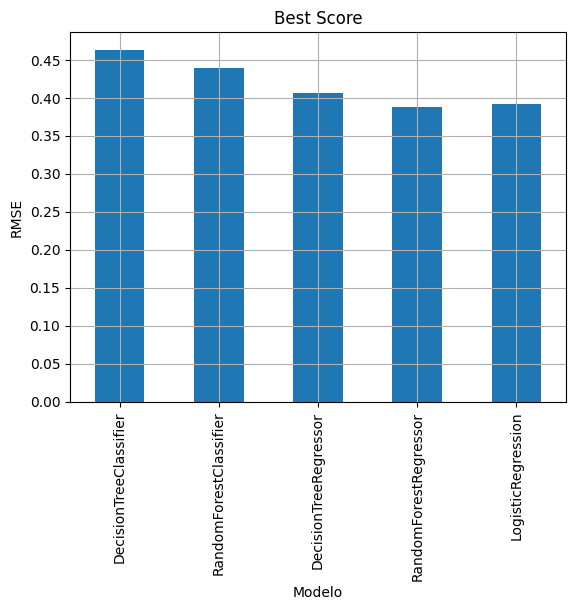

In [30]:
best_scores.plot(title='Best Score',
                   kind='bar',
                   x='model',
                   y='best_score_validator',
                   grid=True,
                   xlabel='Modelo',
                   ylabel='RMSE',
                   legend=False)
yticks = np.arange(0, 0.5, 0.05)
plt.yticks(yticks) 
plt.show()     

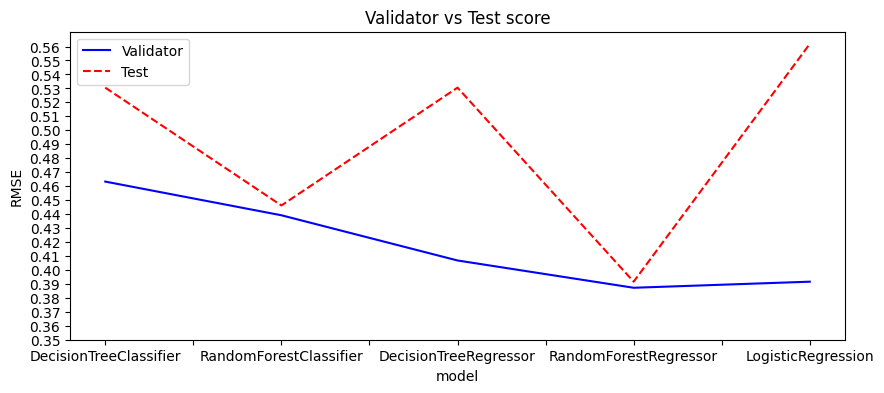

In [32]:
validator = best_scores.plot(title='Validator vs Test score',
                         x='model', y='best_score_validator',
                         xlabel='model',
                         ylabel='RMSE',
                         figsize=[10, 4],
                         color='blue',
                         style='-',
                         label='Validator',
                         legend=False
                        )
test = best_scores.plot(title='Validator vs Test score',
                         x='model', y='test_score',
                         color='red',
                         ax=validator,
                         style='--',
                         label='Test',
                         legend=False
                        )
yticks = np.arange(0.35, 0.57, 0.01)
plt.yticks(yticks) 
plt.legend()
plt.show()

In [33]:
best_scores

,model,best_score_validator,test_score
0,DecisionTreeClassifier,0.463270,0.530559
1,RandomForestClassifier,0.439142,0.446169
2,DecisionTreeRegressor,0.406758,0.530559
3,RandomForestRegressor,0.387214,0.391568
4,LogisticRegression,0.391568,0.561879


En la medida que el modelo se vuelve mas complejo, la puntuacion en los datos de validacion tienden a bajar, sin embargo, al tomar el modelo y probarlo con los datos de prueba se evidencia que los arboles de decision tienden a generar mayor discrepancia que los modelos de bosque.
Por otro lado, el modelo de regresion lineal para esta cantidad de datos, el tiempo de ejecucion fue corta pero los resultados con los datos de prueba fueron significativamente mayores.

Para este modelo en concreto, aunque el tiempo de ejecucion fue mas alta RandomForestRegressor es mas acertada.